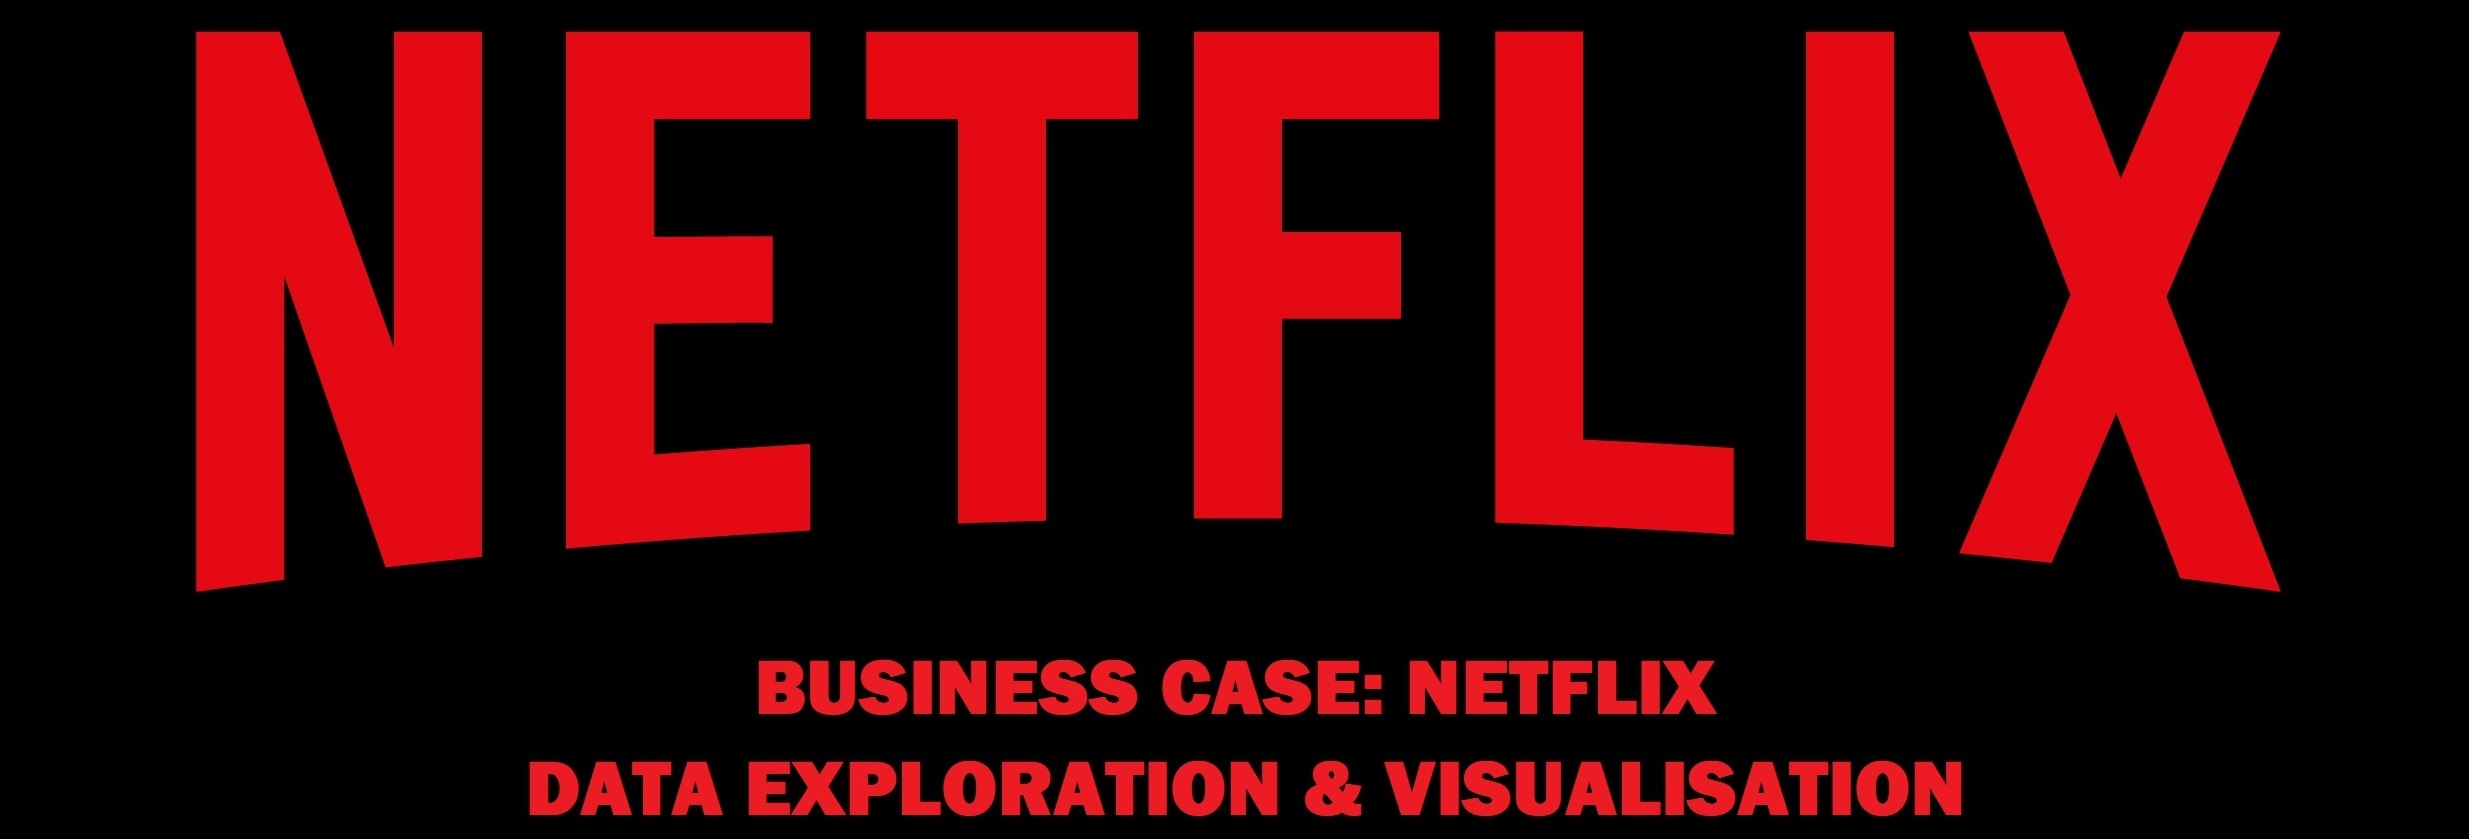

## Problem statement and analysis of basic matrix

## Problem Statement:

## Analyze the given Netflix data, provide useful data-driven insights and recommendation to decide Netflix; which type of movies or TV shows to produce? and how they can grow their business? 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"G:\My Drive\Scaler\Numpy Panda\Netflix\Data\netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### The data was imported from 'netflix.csv' file which contains list of TV shows/ Movies available on Netflix. The data contains total 12 columns namely Show_id, Type, Title, Director, Cast, Country, Date_added, Release_year, Rating, Duration, Listed_in, description. 

## Observations

### Shape of the data

In [4]:
df.shape

(8807, 12)

### Dimensions of data

In [5]:
df.ndim

2

## Missing values and outlier checking

In [6]:
df.info()
print('\nColumns with missing value:') 
print(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
lis

### It was observed that some of the columns namely 'director', 'cast', 'country', 'date_added', 'rating' and 'duration' have missing values. Also the data type of all the columns except 'release_year' is 'object' and data type of 'release_year' is 'int64'.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df[["director","cast","country"]] = df[["director","cast","country"]].fillna("Unknown")

In [8]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

###  Checking unique values in rating columns.

In [9]:
df["rating"].value_counts() 

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

#### It was observed that there are outliers in 'type' which should be replaced in concern 'duration' column

In [10]:
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]
df["duration"][[5541,5794,5813]] = df["rating"][[5541,5794,5813]]
df["rating"][[5541,5794,5813]] = "NaN"

In [11]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
NaN            3
UR             3
Name: rating, dtype: int64

#### To analyze the data further we can convert the data type of columns 'type' and 'rating' to 'category' and 'date_added' to 'datetime'. Also we can replace missing values with appropriate data/values.

In [14]:
df ["date_added"] = pd.to_datetime(df["date_added"])
df =df.astype({"type" : "category", "rating" : "category"})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB


### Statistical Summary:

In [12]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8797,8803,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1767,15,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,1793,362,4


#### United states have most numbers of Movies/TV shows

## Univariate  Analysis:

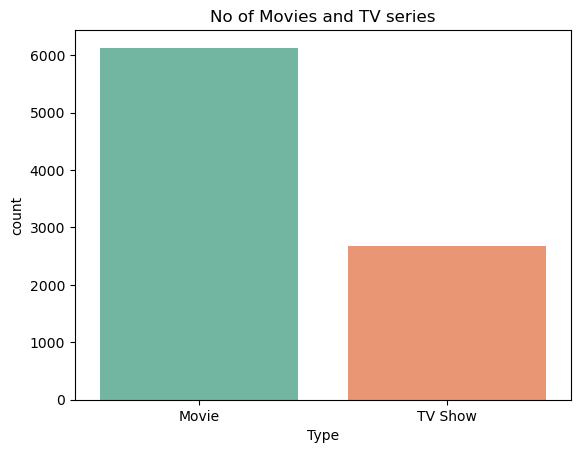

In [61]:
df_datetime = df.copy()
df_datetime['Year'] = df.date_added.dt.year  #adding new columns to the dataframe --> year , month , weekday
df_datetime['month'] = df.date_added.dt.month
df_datetime['day'] = df.date_added.dt.day_name()

sns.countplot(x = "type" , data = df_datetime, palette ='Set2') #countplot to count the no of movies and tv shows available.
plt.title("No of Movies and TV series")
plt.xlabel('Type')
plt.show()

#### More number of movies are available than TV shows 

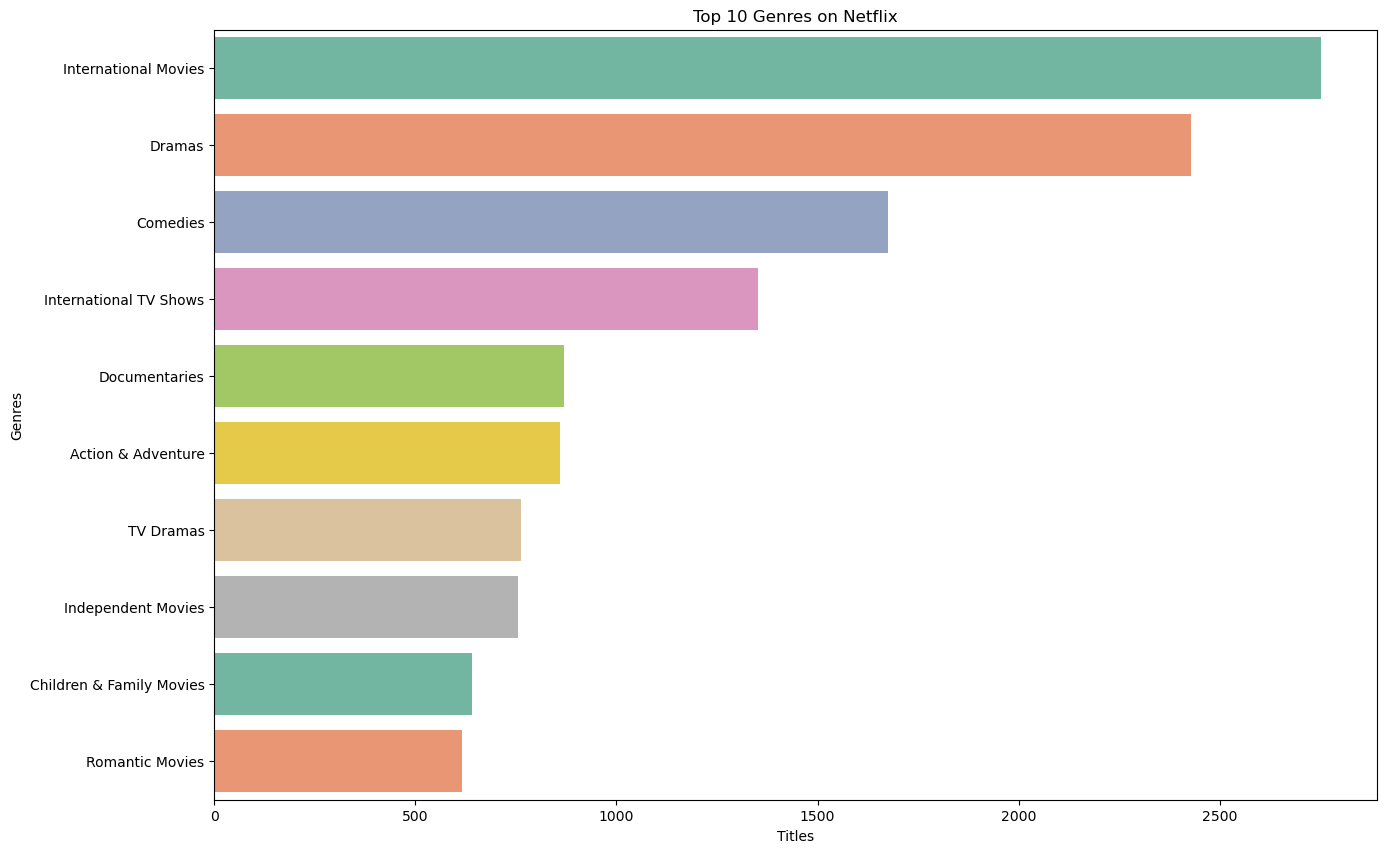

In [62]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10],palette ='Set2' )
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

#### Most popular genre is International Movies followed by dramas and comedies 

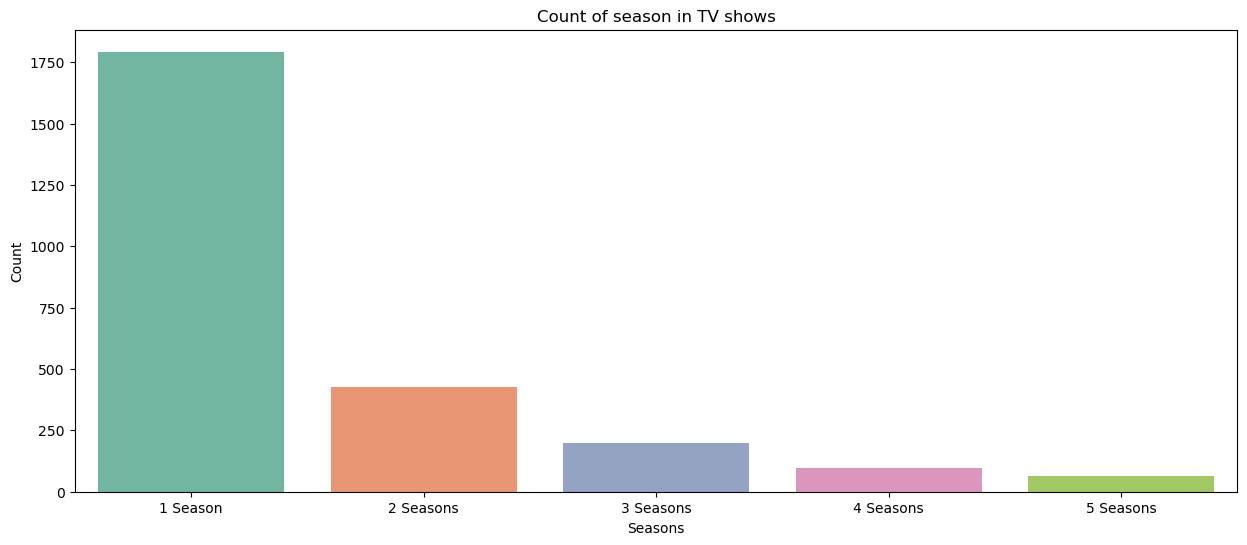

In [19]:
df_TV_season = df.loc[df["duration"].str.contains("Season")== True , "duration" ].value_counts().reset_index()[:5]
df_TV_season.rename(columns = {"index" : "Seasons" , "duration" : "Count"}, inplace = True) 
plt.figure(figsize=(15,6))
sns.barplot(y = "Count", x = "Seasons", data = df_TV_season, palette ='Set2')
plt.title("Count of season in TV shows")
plt.show()

#### There are more number of one season shows 

Text(0.5, 0, 'Release Year')

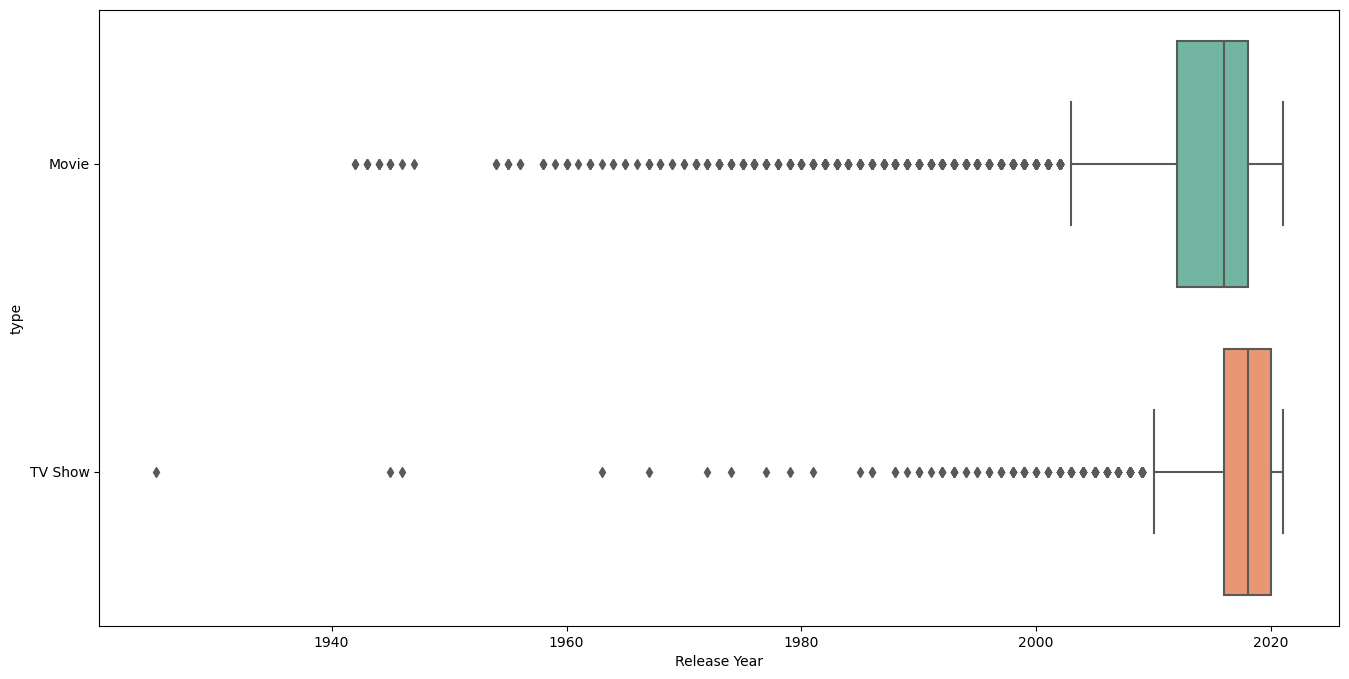

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df["release_year"],y=df["type"], palette='Set2')
plt.xlabel('Release Year')

#### Most number of movies and TV shows were released after 2010 

Text(0.5, 0, 'Release Year')

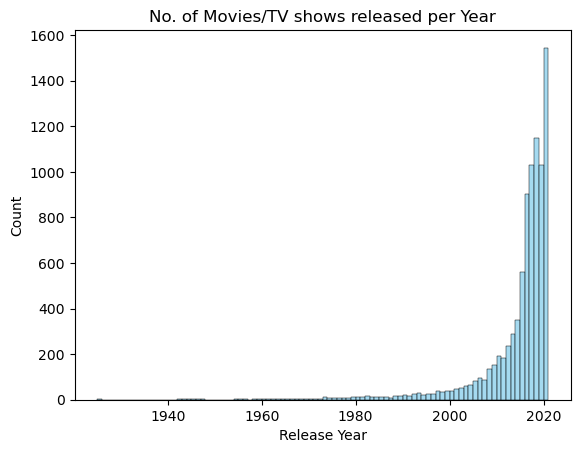

In [57]:
sns.histplot(data=df,x="release_year", color='skyblue',binwidth=1)
plt.title('No. of Movies/TV shows released per Year')
plt.xlabel('Release Year')

Text(0.5, 1.0, 'No. of Movies/TV shows added per Year')

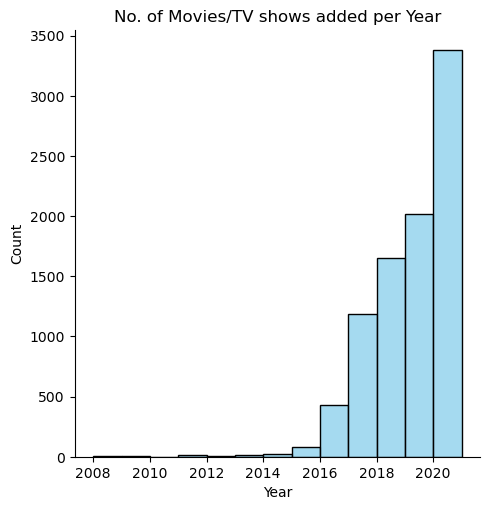

In [58]:
sns.displot(data=df_datetime, x="Year", multiple="stack", color='skyblue', binwidth=1)
plt.xlabel('Year')
plt.title('No. of Movies/TV shows added per Year')

#### Most number movies and TV shows were added after 2015 

## Bivariate Analysis

In [23]:
df_datetime = pd.DataFrame(df)
df_datetime['Year'] = df.date_added.dt.year
df_datetime['month'] = df.date_added.dt.month 
df_datetime['day'] = df.date_added.dt.day_name()
df_datetime_month = df_datetime.sort_values(by ="month")
df_datetime_month['month_name'] = df.date_added.dt.month_name()

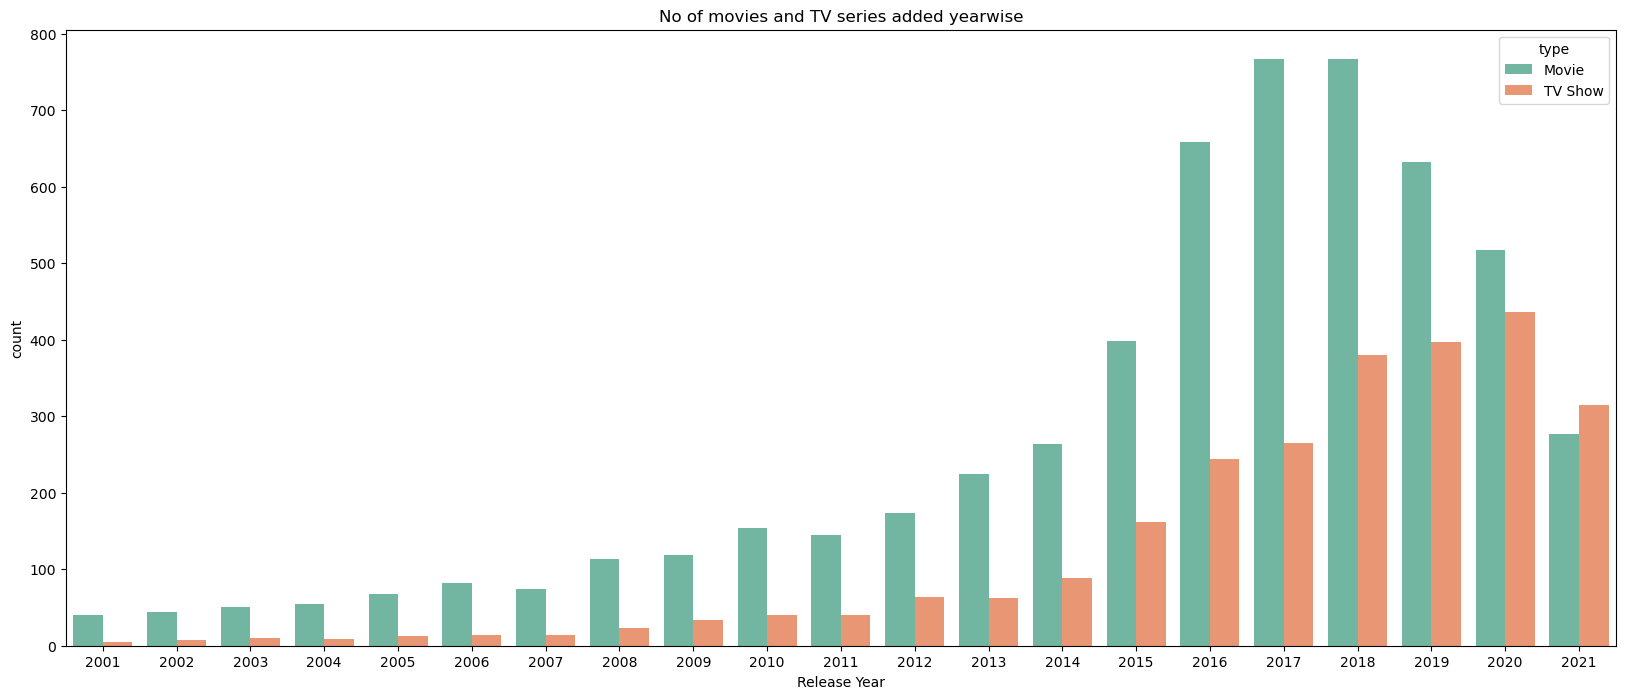

In [59]:
plt.figure(figsize=(20,8))
df_year = df.loc[df['release_year']>2000] #used masked to get out data for movies and TV shows released after 2000
sns.countplot(x='release_year', data = df_year, hue='type',palette='Set2')
plt.title("No of movies and TV series added yearwise")
plt.xlabel('Release Year')
plt.show()

#### Most number of movies were released in 2017 and 2018. In 2020 most number of TV shows were released in 2020 

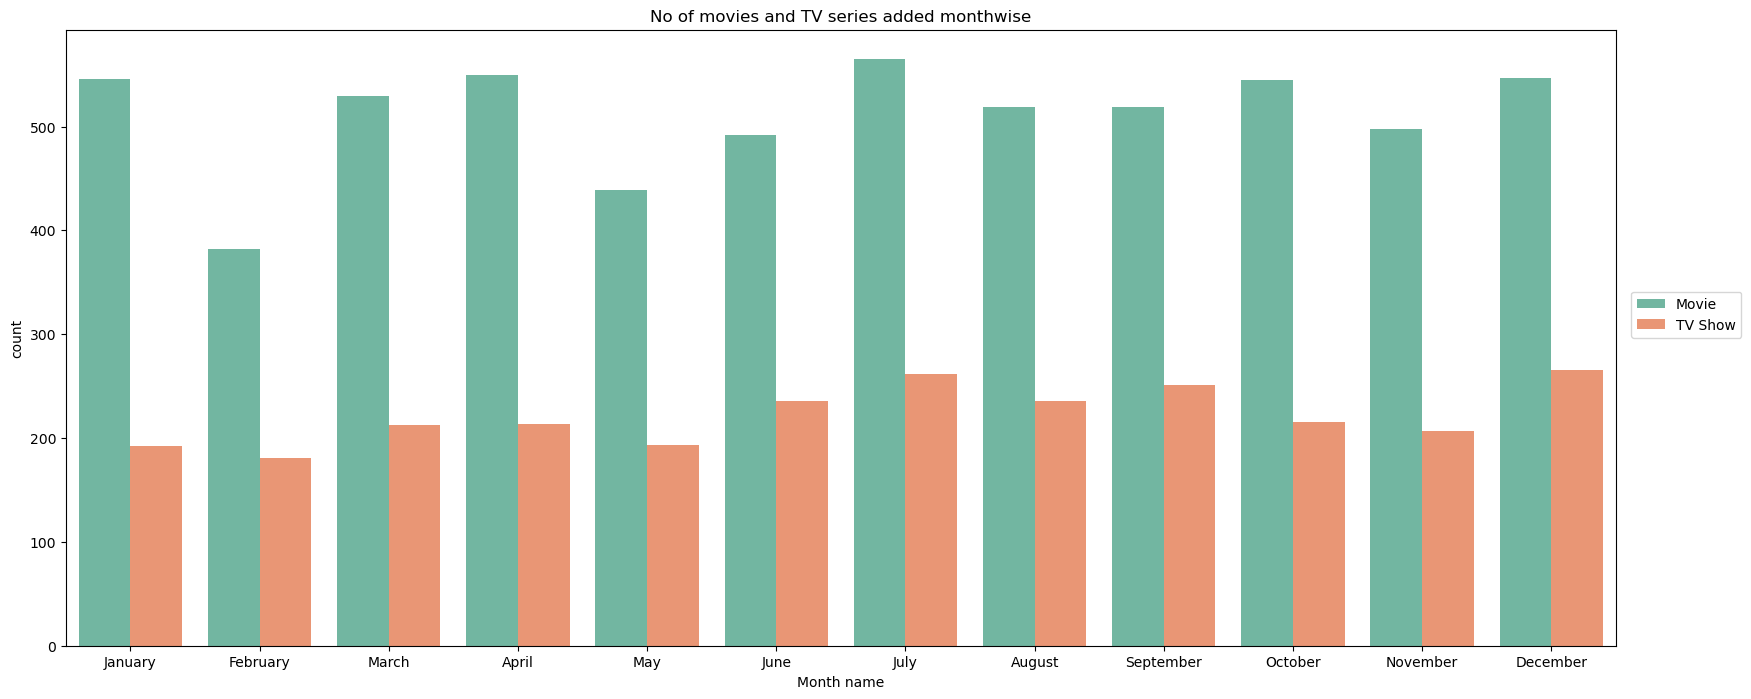

In [60]:
plt.figure(figsize=(20,8)) #defining fig size fot the graph image
sns.countplot(x = "month_name" , data = df_datetime_month , hue = "type", palette='Set2')
plt.title("No of movies and TV series added monthwise") #title name of the plot
plt.legend(loc=(1.01,0.5))
plt.xlabel('Month name')
plt.show()

#### Most movies and TV shows were added in July and December 

## Unnesting of data in Actor, director and country columns 

In [26]:
# Unnesting of Director column
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()  
df_director = pd.DataFrame(director, index = df["title"])
df_director= df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns ="level_1" , inplace = True) 
df_director.columns = ["title" , "director"] 
df_fav_director = df.merge(df_director , on = "title" ) 
df_fav_director.head(4)

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month,day,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,Kirsten Johnson
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,Unknown


In [27]:
#Unnesting country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]

In [28]:
#Unnesting listed_in column
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
df_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [30]:
#Unnesting cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_fav_cast = df.merge(df_cast , on = "title" )

## Non-graphical Analysis

In [29]:
director_countrywise= df_fav_director.merge(df_country , on = "title")
director_countrywise= director_countrywise.drop(columns = ["director_x" , "country_x" ])
director_countrywise.rename(columns = {"director_y": "director" , "country_y" : "country"}, inplace = True)
director_countrywise = director_countrywise.loc[director_countrywise["director"] != "Unknown"]
director_countrywise.reset_index(inplace= True)
director_countrywise.head()

,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,director,country
0,0,s1,Movie,Dick Johnson Is Dead,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,Kirsten Johnson,United States
1,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Julien Leclercq,Unknown
2,5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Friday,Mike Flanagan,Unknown
3,6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Friday,Robert Cullen,Unknown
4,7,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Friday,José Luis Ucha,Unknown


In [31]:
cast_countrywise= df_fav_cast.merge(df_country , on = "title")
cast_countrywise= cast_countrywise.drop(columns = ["cast_x" , "country_x"])
cast_countrywise = cast_countrywise.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
cast_countrywise = cast_countrywise.loc[cast_countrywise["cast"] != "Unknown"].reset_index() #making new dataframe by dropping all rows whose cast is unknown and then resetting the index..00
cast_countrywise.head()

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,Year,month,day,cast,country
0,1,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Ama Qamata,South Africa
1,2,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Khosi Ngema,South Africa
2,3,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Gail Mabalane,South Africa
3,4,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Thabang Molaba,South Africa
4,5,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Dillon Windvogel,South Africa


In [36]:
cast_countrywise["cast"].value_counts().head(5) 

Anupam Kher           46
David Attenborough    45
Vincent Tong          42
John Cleese           40
Tara Strong           39
Name: cast, dtype: int64

#### Anupam Kher(India) is most famous actor by number of count 

In [37]:
director_countrywise["director"].value_counts().head(5)

Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Martin Scorsese     18
Steven Spielberg    18
Name: director, dtype: int64

#### Rajiv Chilaka is most famous director in india

In [48]:
df_trend_country = df.merge(df_country , on = "title")
df_trend_country.drop(columns = "country_x" , inplace = True)
df_trend_country.rename(columns = {"country_y":"country"}, inplace = True)

In [49]:
genre_country_df= df_trend_country.merge(df_genre , on= "title")
genre_country_df.head(5)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Unknown,Crime TV Shows


In [51]:
temp_genre = genre_country_df['genre'].value_counts()[:10].reset_index()
temp_genre.rename(columns = {'index':'genre', 'genre':'count'}, inplace=True)
genre_list = temp_genre['genre'].tolist()
df_top10_genre = genre_country_df.loc[genre_country_df['genre'].isin(genre_list)]
df_top10_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Dramas
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Unknown,International TV Shows
9,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,India,International TV Shows


### Heatmap and pairplot 

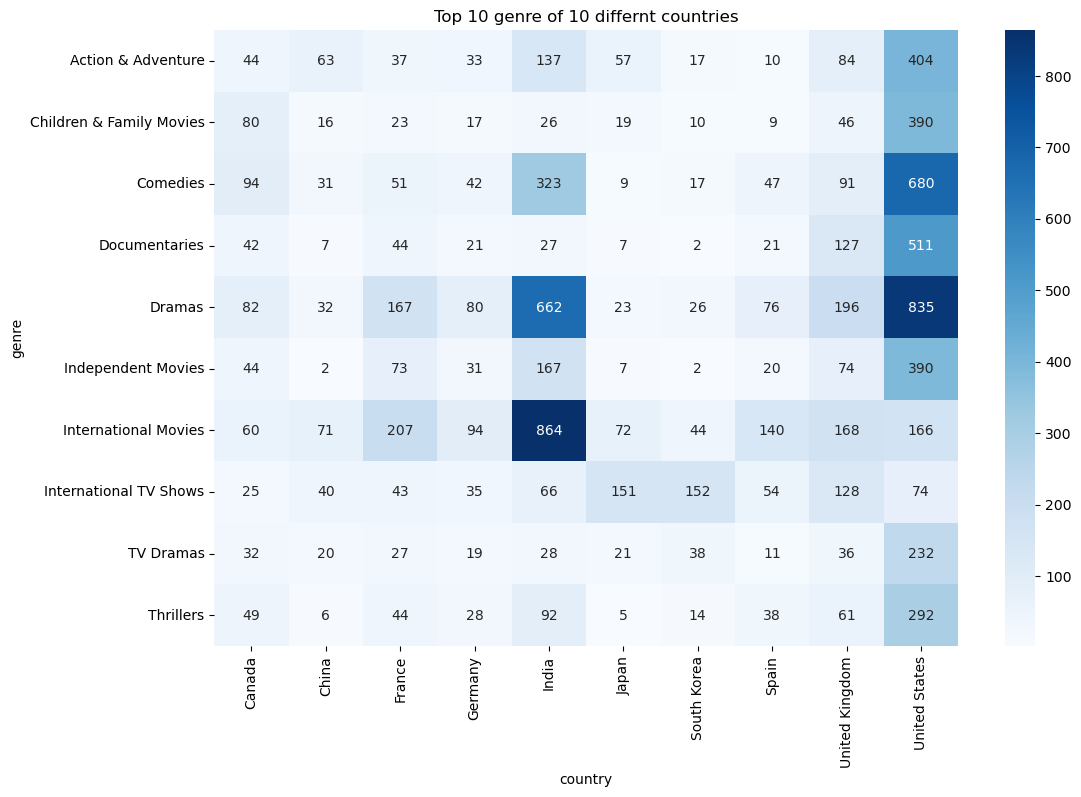

In [53]:
df_top10_genre = df_top10_genre.loc[df_top10_genre["country"] != "Unknown"]
df_top10_genre["country"].value_counts()[:10]

temp_c = df_top10_genre["country"].value_counts()[:10].reset_index()
temp_c.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp_c["country"].tolist()
df_top10_genre_countrywise = df_top10_genre.loc[df_top10_genre['country'].isin(country_list)]
df_top10_genre_countrywise.head()

heat_genre= pd.DataFrame(df_top10_genre_countrywise.groupby("genre")["country"].value_counts())
heat_genre.rename(columns = {"country" : "count"}, inplace = True)
heat_genre.reset_index(inplace = True)
heat_genre_final = heat_genre.pivot("genre" , "country" , "count")
plt.figure(figsize = (12,8))
sns.heatmap(heat_genre_final , annot = True,  cmap="Blues", fmt = "d")
plt.title("Top 10 genre of 10 differnt countries")
plt.show()

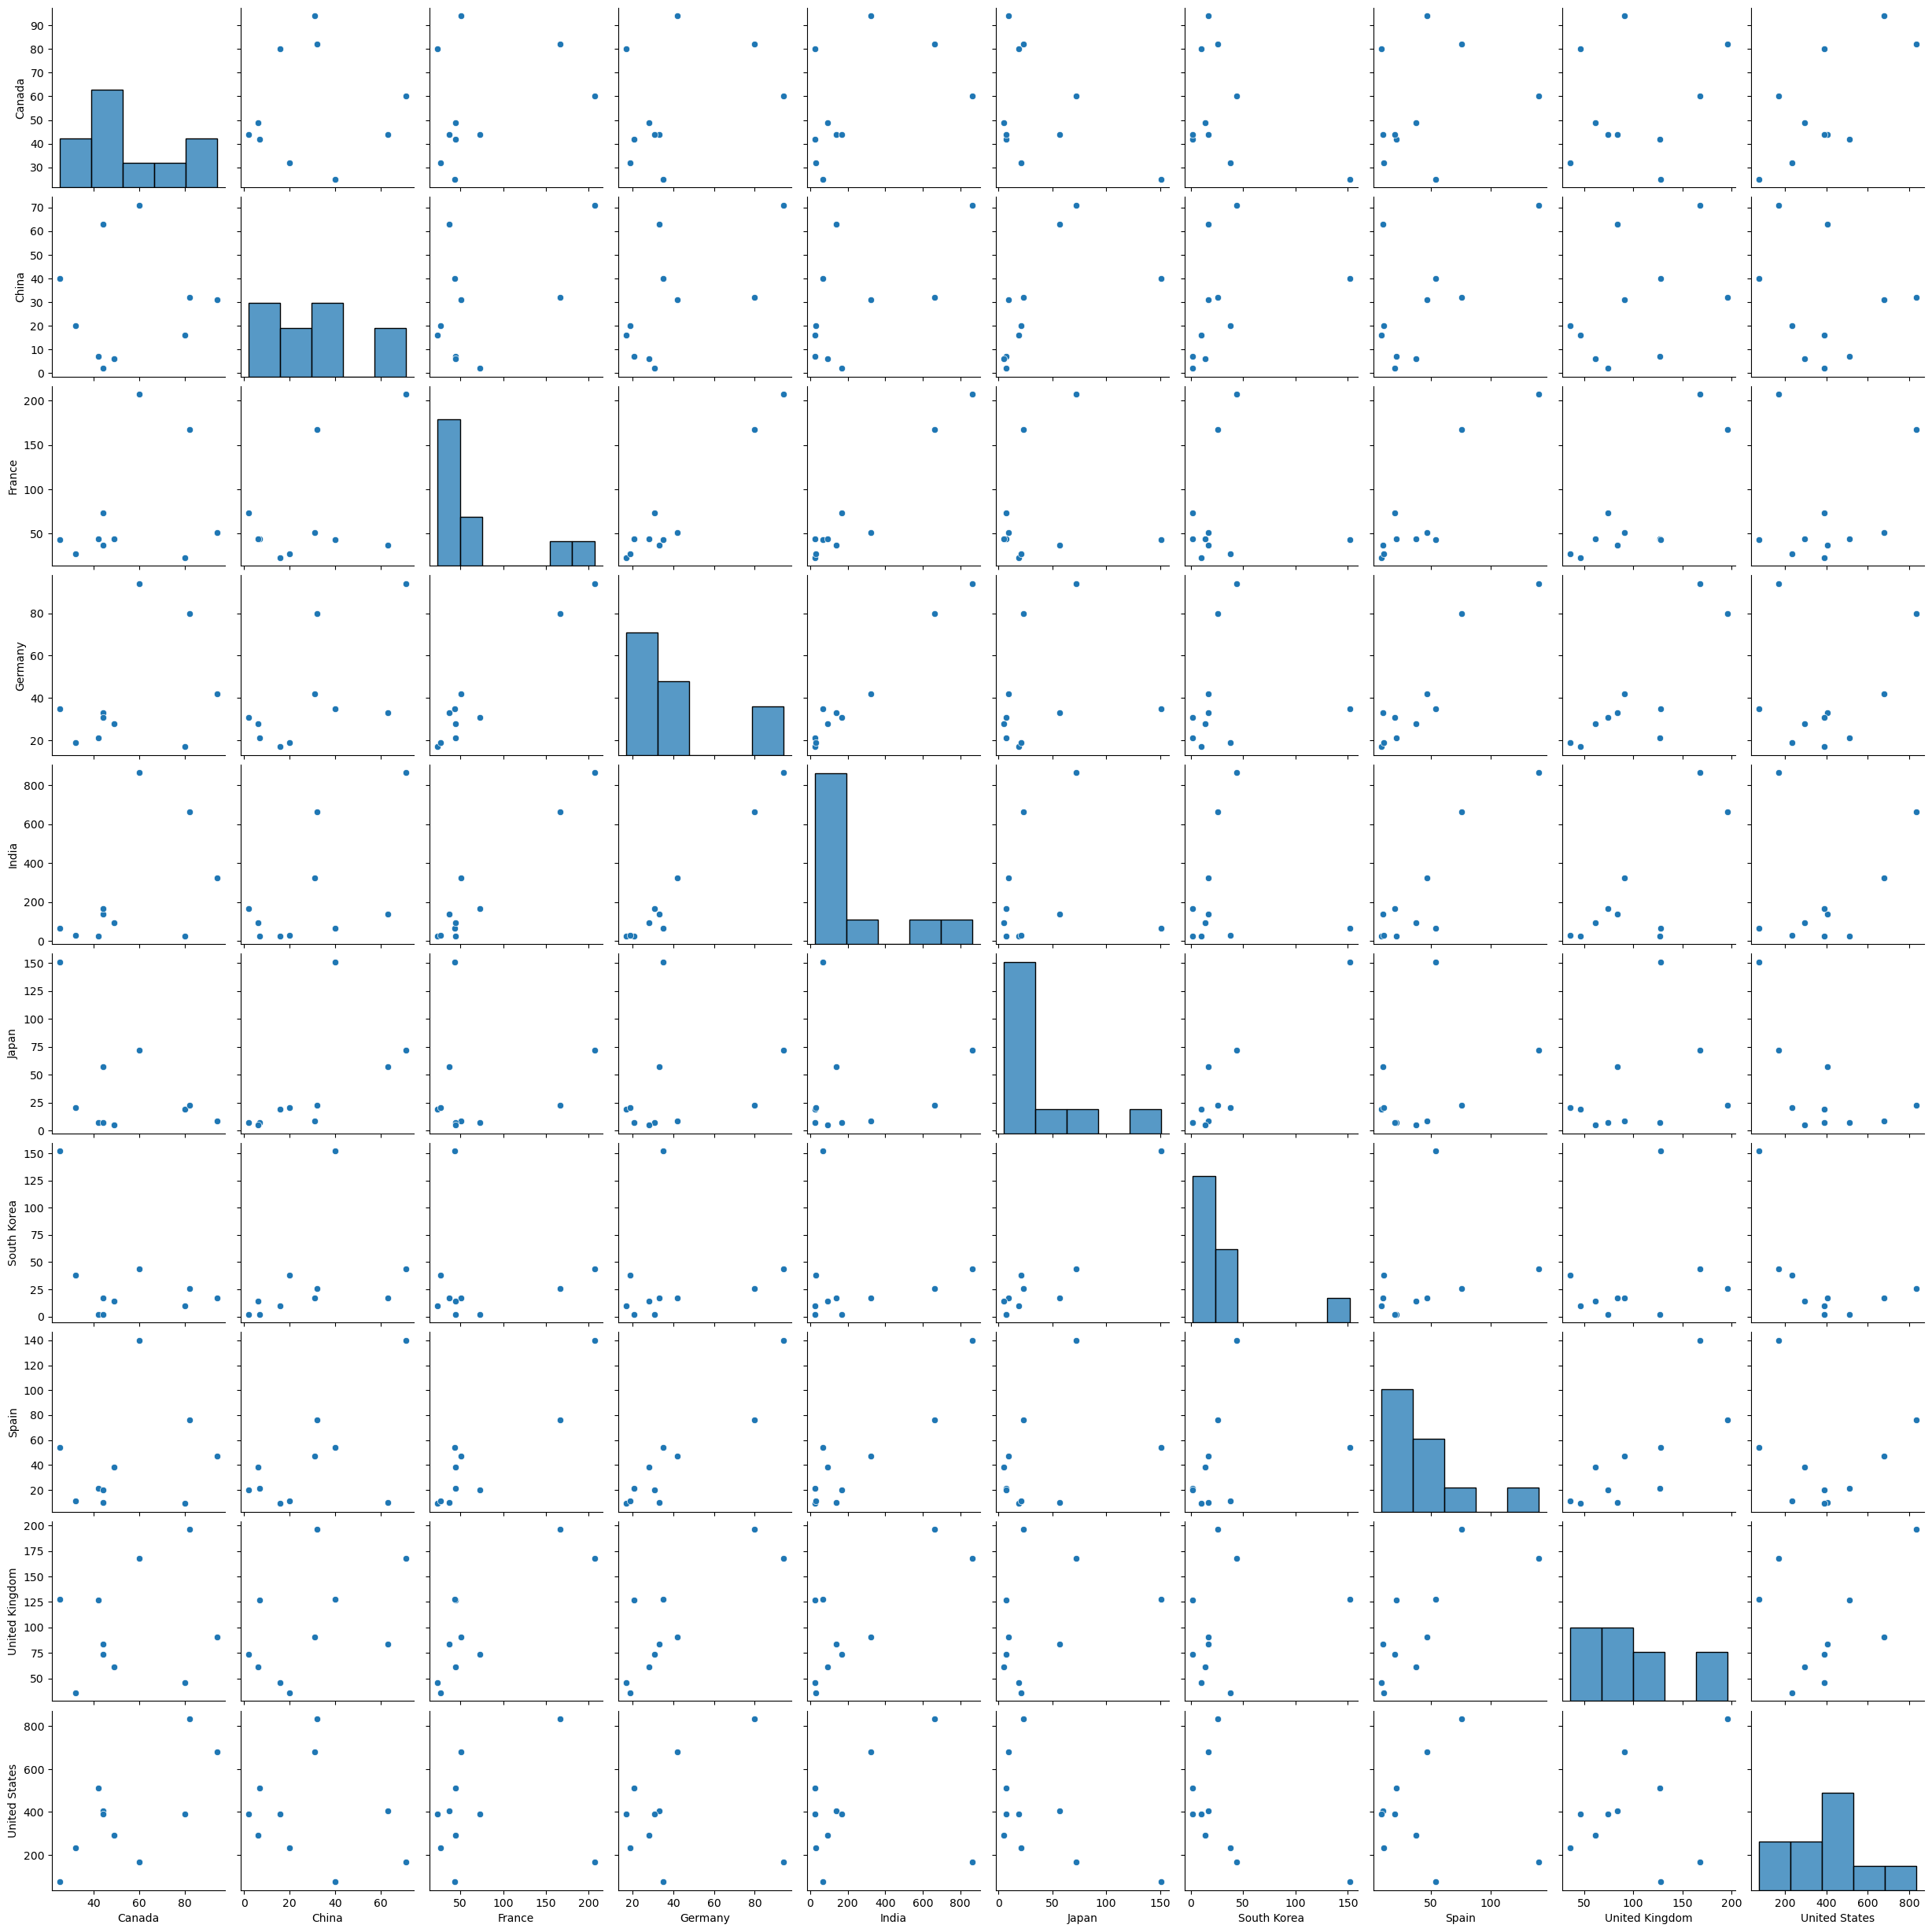

In [56]:
sns.pairplot(heat_genre_final)


### Business Insights
1. TV shows mostly have season1 and season2
2. There are more number of movies than TV shows on Netflix
3. In India International Movies, Drama and Comedies are most popular genre
4. United States produce most number of Movies and TV shows
5. In United states Drama, comedies and documentries are popular genre
6. US, UK and India are popular content creator nations on Netflix
7. The largest count of Netflix content is made with a “TV-MA” rating followed by "TV-14"





















### Recommendations
1. Netflix can add more TV shows now, as latest trend is showing TV shows are getting popular.
2. Netflix should add TV shows having 1 or 2 seasons as they are more in number in data
3. Netflix can add more movies having popular actors and directors
4. Netflix can add more content from international movies, drama and comedies as they are most popular genre
5. Netflix should add more content which is popular in countries like UK, France, Japan and South Korea to increase business